In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

x_cv = y_cv = None
(x, y), (x_test, y_test) = DataUtil.gen_noisy_linear(one_hot=False)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 8)

def draw_acc(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, tl = nn.log["train_acc"], nn.log["test_acc"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(tl))
        plt.plot(ee_base, el, label="Train acc ({})".format(name))
        plt.plot(cse_base, tl, label="Test acc ({})".format(name))
    plt.ylim(0.6, 1.05)
    plt.legend()
    plt.show()

In [3]:
from _Dist.NeuralNetworks.c_BasicNN.NN import Basic

base_params = {
    "model_param_settings": {"n_epoch": 60, "max_epoch": 60},
}
basic = Basic(**base_params).fit(x, y, x_test, y_test, snapshot_ratio=0)

Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train :    0.492   Test :      0.5
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train :      1.0   Test : 0.878667  -  Time Cost: 7.090508460998535


In [4]:
from _Dist.NeuralNetworks.e_AdvancedNN.NN import Advanced

numerical_idx = [True] * 100 + [False]
categorical_columns = []
advanced_params = {
    "data_info": {"numerical_idx": numerical_idx, "categorical_columns": categorical_columns},
    "model_structure_settings": {"use_dndf": False, "use_pruner": False}
}
advanced_params.update(base_params)

In [5]:
wnd = Advanced(**advanced_params).fit(x, y, x_test, y_test, snapshot_ratio=0)

This is a 2-classes problem
------------------------------------------------------------
Data     : 10000 training samples, 1500 test samples
Features : 0 categorical, 100 numerical
Deep model: DNN
Deep model input: Continuous features only
------------------------------------------------------------
------------------------------------------------------------
Using dropout with keep_prob = 0.5
Training with batch norm
Hidden units: [512, 512]
Wide model: logistic regression
Wide model input: Continuous features only
------------------------------------------------------------
Hyper parameters
------------------------------------------------------------
This is a Wide & Deep model
------------------------------------------------------------
Activation       : ['relu', 'relu']
Batch size       : 128
Epoch num        : 60
Optimizer        : Adam
Metric           : acc
Loss             : cross_entropy
lr               : 0.001
------------------------------------------------------------
Pr

In [6]:
advanced_params["model_structure_settings"]["use_dndf"] = True
wnd_dndf = Advanced(**advanced_params).fit(x, y, x_test, y_test, snapshot_ratio=0)

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


This is a 2-classes problem
------------------------------------------------------------
Data     : 10000 training samples, 1500 test samples
Features : 0 categorical, 100 numerical
Deep model: DNN
Deep model input: Continuous features only
------------------------------------------------------------
------------------------------------------------------------
Using dropout with keep_prob = 0.5
Training with batch norm
Hidden units: [512, 512]
Wide model: DNDF
Wide model input: Continuous features only
------------------------------------------------------------
Using DNDF with n_tree = 16, tree_depth = 4
Hyper parameters
------------------------------------------------------------
This is a hybrid model
------------------------------------------------------------
Activation       : ['relu', 'relu']
Batch size       : 128
Epoch num        : 60
Optimizer        : Adam
Metric           : acc
Loss             : cross_entropy
lr               : 0.001
---------------------------------------

In [7]:
advanced_params["model_structure_settings"]["use_pruner"] = True
wnd_dndf_pruned = Advanced(**advanced_params).fit(x, y, x_test, y_test, snapshot_ratio=0)

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


This is a 2-classes problem
------------------------------------------------------------
Data     : 10000 training samples, 1500 test samples
Features : 0 categorical, 100 numerical
Deep model: DNN
Deep model input: Continuous features only
------------------------------------------------------------
------------------------------------------------------------
Using dropout with keep_prob = 0.5
Training with batch norm
Hidden units: [512, 512]
Wide model: DNDF
Wide model input: Continuous features only
------------------------------------------------------------
Using DNDF with n_tree = 16, tree_depth = 4
Hyper parameters
------------------------------------------------------------
This is a hybrid model
------------------------------------------------------------
Activation       : ['relu', 'relu']
Batch size       : 128
Epoch num        : 60
Optimizer        : Adam
Metric           : acc
Loss             : cross_entropy
lr               : 0.001
---------------------------------------

BasicNN              acc  -  Train :      1.0   CV : None   Test : 0.878667
WnD                  acc  -  Train :    0.998   CV : None   Test : 0.894667
WnD & DNDF           acc  -  Train :   0.9987   CV : None   Test : 0.894667
WnD & DNDF & Pruner  acc  -  Train :   0.9676   CV : None   Test : 0.930667


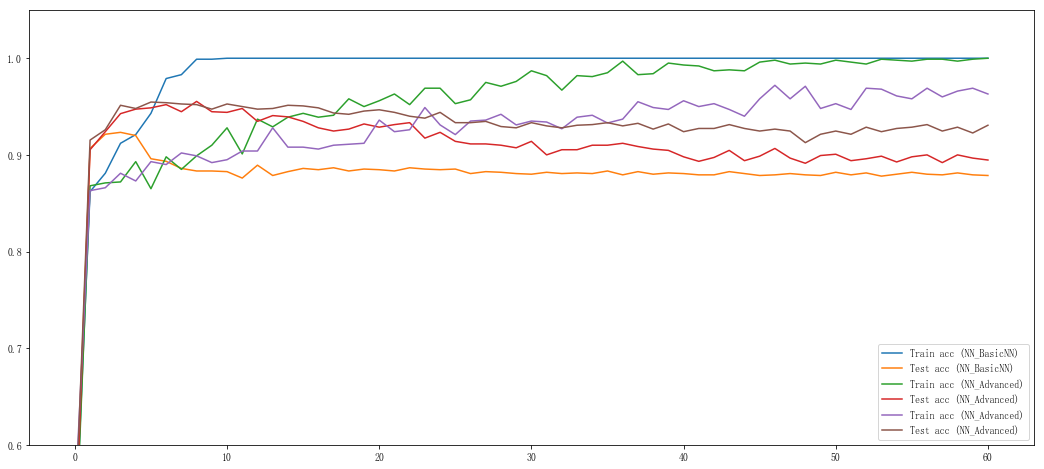

In [8]:
print("BasicNN              ", end="")
basic.evaluate(x, y, x_cv, y_cv, x_test, y_test)
print("WnD                  ", end="")
wnd.evaluate(x, y, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF           ", end="")
wnd_dndf.evaluate(x, y, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF & Pruner  ", end="")
wnd_dndf_pruned.evaluate(x, y, x_cv, y_cv, x_test, y_test)
draw_acc(basic, wnd_dndf, wnd_dndf_pruned)